# Lecture 10: Entropy and Allocation

Topics:

* Maximum entropy method
  * Applications
* Risk capital allocation
  * [optional] Constrained Aumann-Shapley
  

$$\renewcommand{ind}{1{\hskip -2.5 pt}\hbox{l}}
\renewcommand{v}{\text{VaR}}
\renewcommand{rc}{\text{rc}}
$$

# Maximum Entropy

Entropy: noun, lack of order or predictability

Albert Einstein: information is not knowledge

## A model for information

What is the information $i(p)$ when observing an event with probability $p$?

* $i(p) \ge 0$: information never decrease
* $i(1) = 0$: observing a certain event adds no information
* $i(p_1p_2) = i(p_1) + i(p_2)$: information from observing independent events are additive

The only functional form that satisfies these conditions is $i(p) = - \log(p)$
* only meaningful in relative sense
* any base of logarithm would work, as long as it is consistent

## Shannon's information entropy

Expected information from observing a discrete event of $\mathbb{P}[\tilde{x} = x_k] = p_k$:

$$ h(\tilde x) = - \sum_k p_k \log(p_k) $$

For a continuous random variable $\tilde x$ with PDF $p(x)$:

$$ h(\tilde x) = - \int_{-\infty}^\infty p(x) \log\left(p\left(x\right)\right) dx $$

Information entropy $h(\tilde x)$ can also be interpreted as:
* the disorder (lack-of-information) in the distribution

why this is not a good model for knowledge?

## Entropy in coin toss

Consider the toss of fair and unfair coins:

| Coin | $\mathbb{P}[H]$ | $\mathbb{P}[T]$ | Entropy | Information <br> in distribution | Information gain <br> from observation |
| :----: | :----: | :-----: |:-----: | :-----: | :-----: | 
| Fair | $\frac{1}{2}$ | $\frac{1}{2}$ | 1 | none | maximum |
| Unfair | $\frac{1}{4}$ | $\frac{3}{4}$ | 0.81 | more | less |
| Robbery | 0.01 | 0.99 | 0.08 | a lot more | a lot less |
| Two Heads | 1 | 0 | 0 | maximum | none |

* here the entropy is computed using $\log_2(\cdot)$

Entropy is the information contained in the prior distribution. The higher the entropy, the less information you have in prior, but you gain more info from observations.

In [1]:
import numpy as np
p = np.array([.5, .25, .01])
print -p*np.log2(p) - (1-p)*np.log2(1-p)

[ 1.          0.81127812  0.08079314]


## Underdetermined problem 

An optimization problem with more variables than constraints:
* has infinite number of solutions
* requires an objective function for a unique solution
* common problem in quant finance
  * finding implied distribution from few liquid market prices
  * curve building
  
In (early) literature, various ad hoc objective functions are used:
* e.g.: sum of squares of first and second order derivatives

## Ignorance is strength

Disorder (or the lack of information) in a distribution is highly desirable:
* more uncertainty in outcome, leaves open more possibilities
* free from the contamination of irrelevant and artificial restrictions
* the distribution is smooth and well behaved
* more difficult to arbitrage against

Max entropy is the ideal objective for finding implied distributions:
* much better than ad hoc smoothness constraints
* invokes the higher principles of the information theory

## Maximum Entropy Optimization

For a discrete distribution of $\mathbb{P}(\tilde{x} = x_i) = p_k$, the maximum entropy optimization in vector form:
$$\renewcommand{bs}{\boldsymbol}$$
$$ \max \left(-\bs p^T \log (\bs p) \right) $$

subj. to
$$ \begin{array}{l} \bs 1^T \bs p & = 1 \\
A \bs p &= \bs b
\end{array}$$

* all analytical functions are applied element-wise
  * e.g. $\exp(\bs p), \log(\bs q)$ are column vectors
  * $\small \frac{\partial}{\partial \bs p} \left(\bs p^T \log(\bs p)\right) = \log(\bs p^T) + \bs 1^T \iff
  \frac{\partial}{\partial p_k} \left(\sum_i p_i \log(p_i)\right) = \log(p_k) + 1$
  
* we only consider linear constraints, tractable and adequate in practice

The continuous version can be expressed similarly with integrals.

Entropy is a scalar (dot product of $\bs p^T$ and $\log{(\bs p)}$.

## Uniform distribution

Uniform distribution has the maximum entropy among all distributions.
* without additional information, we have to assume the coin is fair

Apply the Lagrange multiplier:

$$ \begin{array}
\\ l &= - \bs p^T \log(\bs p) - \lambda (\bs 1^T \bs p - 1) \\
\frac{\partial l}{\partial \bs p} &= -\log(\bs p^T) - \bs 1^T - \lambda \bs 1^T = \bs 0^T \\
\log(\bs p) &= -(1+\lambda) \bs 1
\end{array}$$

therefore, $\bs p$ is a uniform distribution

## Normal distribution

Normal distribution has the maximum entropy with given mean and variance
* This explains the ubiquity of the normal distribution
* Knowing only mean and variance, we have to assume the distribution is normal

Apply the Lagrange multiplier:
$$\renewcommand{intr}{\int_{-\infty}^{\infty}}$$
$$\small
\begin{array}
\\ l &= & - \intr p(x) \log(p(x)) dx + \lambda_1 (\intr p(x) dx - 1) \\
     &  & + \lambda_2 (\intr x p(x) dx - \mu) + \lambda_3 (\intr (x - \mu)^2 p(x) dx - \sigma^2) \\
& = & \intr \left(-p\log(p) + \lambda_1 p + \lambda_2 xp + \lambda_3(x-\mu)^2 p\right) dx - \lambda_1 - \mu\lambda_2 - \sigma^2 \lambda_3 \\
& = & \intr g dx - \lambda_1 - \mu\lambda_2 - \sigma^2\lambda_3 \\
\frac{\partial g}{\partial p} &= &-\log(p) - 1 + \lambda_1 + \lambda_2x + \lambda_3(x-\mu)^2 = 0 \\
p(x) &= & \exp(\lambda_3(x-\mu)^2 + (\lambda_1 -1) + \lambda_2 x)
\end{array}$$

Therefore we must have: $\lambda_3 < 0, \lambda_2 = 0$, otherwise $p(x)$ explodes. 

## Exponential distribution

Exponential distribution has the maximum entropy for a positive random variable with a given expectation
* Without addtional information, we have to assume all survival times are exponetially distributed.

Apply the Lagrange multiplier:

$$\renewcommand{intp}{\int_0^{\infty}}
\small
\begin{array}
\\ l &= - \intp p(x) \log(p(x)) dx + \lambda_1 (\intp p(x) dx - 1) + \lambda_2 (\intp x p(x) dx - \mu) \\
& = \intp \left(-p\log(p) + \lambda_1 p + \lambda_2 xp \right) dx - \lambda_1 - \mu\lambda_2 = \intp g dx - \lambda_1 - \mu\lambda_2 \\
\frac{\partial g}{\partial p} &= -\log(p) - 1 + \lambda_1 + \lambda_2x = 0 \\
p(x) &= \exp((\lambda_1 -1) + \lambda_2 x)
\end{array}$$

Therefore $\lambda_2 < 0$, otherwise $p(x)$ explodes

## Numerical examples

In [2]:
%pylab inline
import me
from scipy.optimize import minimize
import pandas as pd
lecture = 10

matplotlib.rcParams.update({'font.size': 14})

Populating the interactive namespace from numpy and matplotlib


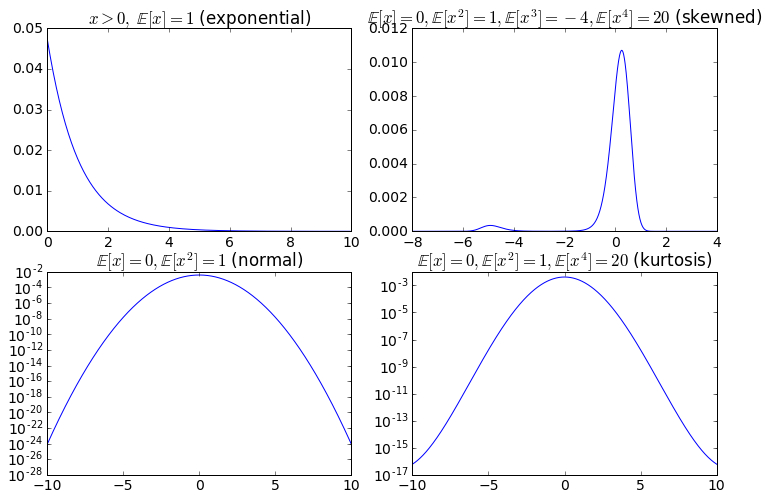

In [4]:
x = np.arange(0, 10, .05)
a = np.array([x]) # first moment
u = np.array([1.]) # mean
e = np.array([0])
q = np.ones(np.size(x))
dual = me.MaxEntDual(q, a, u, e)

res = minimize(dual.dual, np.zeros(len(u)), jac=dual.grad, method="BFGS")

figure(figsize=[12, 8])
subplot(2, 2, 1)

plot(x, dual.dist(res.x));
title('$x>0,\; \mathbb{E}[x]=1$ (exponential)');

subplot(2, 2, 3)
x = np.arange(-15., 15., .01)
a = np.array([x, x*x]) # first and second moments (pricing equation)
u = np.array([0., 1.]) # first and second moment values
e = np.array([0., 0.]) # error
q = np.ones(np.size(x))/len(q) # prior belief (if uniform: cross entropy = regular entropy)
dual = me.MaxEntDual(q, a, u, e)

res = minimize(dual.dual, np.zeros(len(u)), jac=dual.grad, method="BFGS")
semilogy(x, dual.dist(res.x))
xlim(-10, 10)
ylim(1e-28, 1e-2)
title('$\mathbb{E}[x] = 0, \mathbb{E}[x^2] = 1$ (normal)');

subplot(2, 2, 4)
a = np.vstack([a, x*x*x*x]) # 1,2, and 4-th moments
u = np.append(u, 20) # moment values
e = np.append(e, 0)
dual = me.MaxEntDual(q, a, u, e)

res = minimize(dual.dual, np.zeros(len(u)), jac=dual.grad, method="BFGS")
semilogy(x, dual.dist(res.x))
xlim(-10, 10)
title('$\mathbb{E}[x] = 0, \mathbb{E}[x^2] = 1, \mathbb{E}[x^4] = 20$ (kurtosis)');

subplot(2, 2, 2)
a = np.vstack([a, x*x*x])
u = np.append(u, -4)
e = np.append(e, 0)
dual = me.MaxEntDual(q, a, u, e)

res = minimize(dual.dual, np.zeros(len(u)), jac=dual.grad, method="BFGS")
plot(x, dual.dist(res.x))
xlim(-8, 4)
title('$\mathbb{E}[x] = 0, \mathbb{E}[x^2] = 1, \mathbb{E}[x^3] = -4, \mathbb{E}[x^4] = 20$ (skewned)');

* we will discuss the details of numerical implementation later

## Cross entropy

Cross entropy is a measure of incremental information in a 
distribution $\bs p$ in relative to a prior distribution $\bs q$; 

* Also known as the Kullback–Leibler distance

With a discrete prior $\mathbb{P}[\tilde{x} = x_k] = q_k$ (your wrong belief in prior) and posterier $p_k$ :

$$ h(\bs p | \bs q) = -\sum_k p_k \log(p_k) + \sum_k p_k \log(q_k) = - \sum_k p_k \log\left(\frac{p_k}{q_k}\right) $$

Similarly with a continuous prior $q(x)$ and posterier $p(x)$ :

$$ h\left(p(x) | q(x)\right) = - \intr p(x) \log \left(\frac{p(x)}{q(x)}\right) dx $$

The smaller (more negative) the cross entropy is, the more incremental information in $\bs p$ from $\bs q$

## Properties of cross entropy

Cross entropy $h(\bs p| \bs q) = - \bs p^T(\log(\bs p) - \log(\bs q))$:
* a measure of the lack of incremental information in $\bs p$ from $\bs q$, ** non positive **
* reduces to regular entropy when the prior $\bs q$ is uniform (minus a constant is equivalent to change of log base)
* maximized with value 0 when $\bs p = \bs q$. (The more negative it is, the more incremental information)
 * no additional information
 * Proof: apply the Lagrange multiplier
* $h(\bs p| \bs q) = -\infty$ if $p_k > 0$ for some $q_k = 0$
 * new discovery adds infinite amount of new information
* finite if $p_k = 0$ for some $q_k > 0$
 * not much value for disapproving an existing theory
* Prior and posterior distributions are asymmetric $h(\bs p | \bs q) \ne h(\bs q | \bs p)$
 * Kullback–Leibler distance is actually a misnomer (i.e., this "distance" is not symmetric)

## Prior beliefs in the market

Prior beliefs are common in the market:

* e.g., stock returns are normally distributed

Maximizing cross entropy (making it close to 0) is an ideal objective function to capture prior beliefs
* Only introduce minimal perturbation to the prior beliefs $\bs q$
* While incorporating additional constraints to the distribution $\bs p$

## Cross entropy optimization with bid/ask

Take the discrete form of cross entropy:

$$ \max - \bs p^T \left(\log(\bs p) - \log(\bs q)\right)  - \frac{1}{2} \bs e^T W \bs e $$
subj. to : 
 $$\begin{array}\\
 \bs 1^T \bs p & = 1 \\
 A \bs p &= \bs b + \bs e 
 \end{array}$$
 
* $A$ is a matrix that computes benchmark prices from the distribution
* $\bs b$ is the observed mid price of benchmark instruments
* $\bs e$ is the pricing error associated with the mid price
* $W$ is a diagonal penalty matrix, we usually choose $W^{-1} = \alpha E$
  * where $E$ is a diagonal matrix of bid/ask spreads, 
  * $\alpha$ controls the trade off between fit quality and entropy

This problem is difficult to solve due to the dimensionality and constraints.

## If you have a hammer ...

The Lagrange multiplier has served us well so far, let's nail it:

$$\small
\begin{array} \\ 
l &= - \bs p^T \left(\log(\bs p) - \log(\bs q)\right)  - \frac{1}{2} \bs e^T W \bs e -
\bs u^T(A\bs p - \bs b - \bs e)  - v (\bs 1^T \bs p - 1) \\
\frac{\partial l}{\partial \bs p} &= \log(\bs q^T) -\log(\bs p^T) - \bs 1^T - \bs u^T A - v \bs 1^T = 0 \\
\log(\bs p^*) &= \log(\bs q) - A^T \bs u - \bs 1 - v \bs 1 \\
\end{array}$$

* $\bs p^*$ is the optimal solution. 
* we haven't solved the problem, as $\bs e, \bs u, v$ remain unknown 

but the dimensionality of $l$ is reduced, by plugging in $\bs p^*$:

$$\begin{array} \\ 
l &= - \bs p^{*T} \left( - A^T \bs u - \bs 1 - v \bs 1 \right)  -  \frac{1}{2} \bs e^T W \bs e -
\bs u^T(A\bs p^* - \bs b - \bs e)  - v (\bs 1^T \bs p^* - 1) \\
 &= \bs p^{*T} \bs 1 - \frac{1}{2} \bs e^T W \bs e + \bs u^T \bs b + \bs u^T \bs e + v \\
\end{array} $$

What to do with $\bs e$? note $\bs p^*$ does not depend on $\bs e$:

$$
\frac{\partial l}{\partial \bs e} = - \bs e^T W + \bs u^T = \bs 0^T \iff \bs e = W^{-1} \bs u 
$$

plug $\bs e$ back to $l$:

$$
l = \bs q^T \exp(-A^T \bs u - 1 - v) + \frac{1}{2} \bs u^T W^{-1} \bs u + \bs u^T \bs b + v
$$

do the same to $v$:

$$\begin{array}
\\ \frac{\partial l}{\partial v} &= - \bs q^T \exp(-A^T \bs u - 1 - v) + 1  \\
&= - \bs q^T \exp(-A^T \bs u) \exp(- 1 - v) + 1 = 0 \\
v &= \log \left(\bs q^T \exp(-A^T \bs u)\right) - 1 \\
\end{array}$$

plug $v$ in to $l$:

$$\begin{array}
\\ l &= 1 + \frac{1}{2} \bs u^T W^{-1} \bs u + \bs u^T \bs b + \log \left(\bs q^T \exp(-A^T \bs u)\right) - 1 \\
 &= \log \left(\bs q^T \exp(-A^T \bs u)\right) + \frac{1}{2} \bs u^T W^{-1} \bs u + \bs u^T \bs b
\end{array}$$

Now $\bs u$ are the only unknowns, this $l$ is much easier to minimize.

## Dual problem

|  | Original Problem | Dual Problem |
| :---: | :---: | :---: |
| Objective | $ \scriptsize - \bs p^T \left(\log(\bs p) - \log(\bs q)\right)  - \frac{1}{2} \bs e^T W \bs e $| $ \scriptsize \log \left(\bs q^T \exp(-A^T \bs u)\right) + \frac{1}{2} \bs u^T W^{-1} \bs u + \bs u^T \bs b$  |
| Extreme type | maximum |minimum |
| Solve for | $\bs p$: high dimension | $\bs u$: low dimension |
| Constraints | $ \bs 1^T \bs p = 1, A \bs p = \bs b + \bs e$ | None |
| Convex | Yes | Yes |

* The dual problem is much easier to solve 
  * the gradient is analytical, suitable for gradient descent
* A solution is guaranteed to exist if $W$ is diagonal and positive

Once we find the optimal $\bs u^*$ that minimizes the dual objective:

$$
\bs p^* = \frac{\bs q \odot \exp(- A^T \bs u^*)}{\bs q^T \exp(- A^T \bs u^*)}
$$

* $\odot$ is element wise multiplication

# Maximum Entropy Applications

## Volatility skew

In the option market, OTM calls command higher implied volatility than the ATM/ITM calls.

Suppose we only have the following three liquid 5M S&P500 index option:

In [6]:
from inst import BlackScholes
from scipy.stats import norm
import fmt

def optionCons(strikes, s) :
    a = [np.maximum(s-k, 0) for k in strikes]
    return np.array(a)


iv = np.array([.1594, .1481, .1383])

s = 1652.32 # spot price
r = 0. # interest rate
t = 5./12 # maturity

ks = np.array([1611, s, 1694]) # strikes

cs = np.array([BlackScholes.callPrice(0, s, k, t, v) for k, v in zip(ks, iv)])
d = np.array([BlackScholes.callDelta(0, s, k, t, v) for k, v in zip(ks, iv)])

df_opt = pd.DataFrame(np.array([cs, iv*100, d]).T, columns = ["Call Price", "Implied Vol(%)", "Delta"], index=ks)
fmt.displayDF(df_opt, "4g")

x = s*np.exp(np.arange(-1.5, 3, .001)) # possible stock prices 
q = np.ones(len(x))
qn = norm.pdf((np.log(x/s)+.5*iv[1]*iv[1]*t)/(iv[1]*np.sqrt(t)))
qn = qn/sum(qn)

a = optionCons(ks, x)
e = np.ones(len(ks))*.0
# other market strikes and implied volatilities (only for reference)
mks = np.array([1322,  1487,  1570,  1611,  1652,  1694,  1735, 1818, 1982])
mvs = np.array([.2319, .1895, .1687, .1594, .1481, .1383, .1289, .1176, .1125])

,Call Price,Implied Vol(%),Delta
"1,611",89.62,15.94,0.617
"1,652",62.99,14.81,0.5191
"1,694",41.03,13.83,0.4073


How to price options of other strikes?

## Entropy optimizaiton setup

We sample the future stock price distribution discretely as: $p_i = \mathbb{P}[s(t = 5M) = s_i]$, where $s_i$ is a discretization of the stock prices.

Each observed option price $v(k)$ becomes a linear constraint in $p_i$:

$$ b(t) \mathbb{E}[(s(t)-k)^+] = b(t) \sum_i p_i (s_i - k)^+ = v(k) $$ 

* The machinery of the dual maximum entropy setup is then applied to find the implied distribution of $\bs p^*$
* Option prices of all strikes are then known from $\bs p^*$
* The discounting $b(t)$ is ignored as the time horizon is very short.

## Maximum entropy solution

The ME optimization results without prior does not make much sense even though it exactly reprices the observed prices.

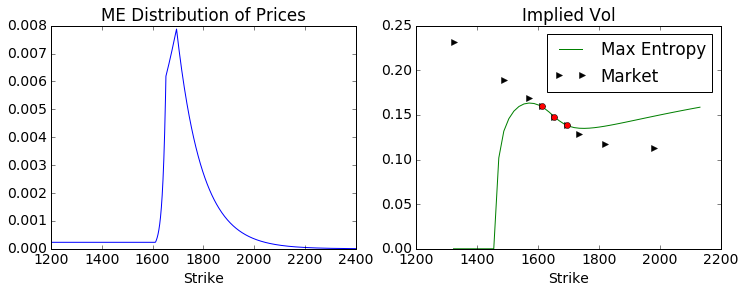

In [7]:
dual = me.MaxEntDual(q, a, cs, e) # q is an array of one's : no prior belief in return distribution = uniform prior
# MaxEntDual(prior, pricing matrix, price, error)
res = minimize(dual.dual, np.zeros(len(cs)), jac=dual.grad, method="BFGS")
po = dual.dist(res.x) # posterior distribution p

kd = arange(80., 130., 1.)/100*s
cd = np.array([po.dot(np.maximum(x-k, 0)) for k in kd])
vd = [BlackScholes.compImpliedVolFromCall(0., s, k, t, c) for k, c in zip(kd, cd)]
#dd = [BlackScholes.callDelta(0, s, k, 1, v) for k, v in zip(kd, vd)]

figure(figsize=[12, 4])
subplot(1, 2, 1)
plot(x, dual.dist(res.x))
xlabel('Strike')
title('ME Distribution of Prices')
xlim(1200,2400)

subplot(1, 2, 2)
plot(kd, vd, 'g-')
plot(mks, mvs, 'k>')
plot(ks, iv, 'ro')
xlim(1200, 2200)
xlabel('Strike')
title('Implied Vol');
legend(['Max Entropy', 'Market']);

## Use the prior belief

We can take advantage of the prior belief that the stock return is normal, and use the observed ATM vol in the prior.  

* The resulting distribution and volatility skew are reasonble
* The whole vol skew curve is inferred from three option prices
* The resulting option prices are very close to the actual market

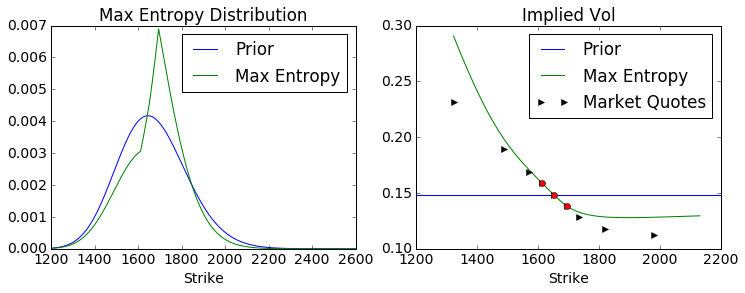

In [18]:
dual = me.MaxEntDual(qn, a, cs, e)
res = minimize(dual.dual, np.zeros(len(cs)), jac=dual.grad, method="BFGS")
po = dual.dist(res.x)

cd = np.array([po.dot(np.maximum(x-k, 0)) for k in kd])
vd = [BlackScholes.compImpliedVolFromCall(0, s, k, t, c) for k, c in zip(kd, cd)]
#dd = [BlackScholes.callDelta(0, s, k, 1, v) for k, v in zip(kd, vd)]

figure(figsize=[12, 4])
subplot(1, 2, 1)
plot(x, qn)
plot(x, dual.dist(res.x))
xlabel('Strike')
title('Max Entropy Distribution')
legend(['Prior', 'Max Entropy'])
xlim(1200,2600)

subplot(1, 2, 2)
axhline(iv[1])
plot(kd, vd, 'g-')
plot(mks, mvs, 'k>')
plot(ks, iv, 'ro')
xlim(1200, 2200)
xlabel('Strike')
legend(['Prior', 'Max Entropy', 'Market Quotes'])
title('Implied Vol');

## Curve building revisited

We already know how to build good CDS/IR curves using:

* Bootstrap and iteration
* Tension spline interpolation

However, there are some unanswered questions:

* which is a better state variable, zero rate $r(t) = -\frac{1}{t}\log(b(t))$ or cumulative yield $y(t) = -\log(b(t))$?
* what tension parameter makes more sense?
* what if market prices are arbitrageable?

Maximum entropy method can help answer these questions.

## IR curve building

Typical instruments to build USD IR curves:

* deposits: 1D, 1M, 2M, 3M (short-term)
* 3M IR Futures (or FRA): 3M, 6M, 12M, ..., 33M, 36M (medium-term)
* Swaps: 4Y, 5Y, ..., 19Y, 20Y, 25Y, 30Y, 35Y, 40Y, 50Y (long-term)

these instruments have different liquidity and their prices are not necessarily compatible with each other

* it is not necessary to exactly match all mid market prices, usually it is adequate to be within the bid/ask
* it is not uncommon for market prices to be arbitrageable, thus impossible to exactly fit all market mids 

## Instruments for building IR curves

$b(t)$ is the market price of zero coupon bond maturing at quarterly date $t$, then the market observable prices can 
be expressed as a linear system of $C\bs b = \bs v$:

$$\tiny
\begin{array}\\ \text{Deposits} \begin{cases} \begin{array}
\\ \\ \\ \\ \\
\end{array}\end{cases}\\
\text{Futures}\begin{cases}\begin{array}
\\ \\ \\ \\ \\
\end{array}\end{cases}\\
\text{Swaps}\begin{cases}\begin{array}
\\ \\ \\ \\ \\ 
\end{array}\end{cases}\end{array}
\begin{pmatrix}
& * & \\
&   & * & \\
& & & * & \\
& & & & * & \\
& & & * & * \\
& & & & * & * \\
& & & & & * & * \\
& & & & & & * & * \\
& * & * & * & * & * & * & * & * & * \\
& * & * & * & * & * & * & * & * & * & * & * \\
& * & * & * & * & * & * & * & * & * & * & * & * & * \\
& * & * & * & * & * & * & * & * & * & * & * & * & * & * & * 
\end{pmatrix} 
\begin{pmatrix}
* \\ * \\ * \\ * \\ * \\ * \\ * \\ * \\ * \\ * \\ * \\ * 
\end{pmatrix} = 
\begin{pmatrix}
* \\ * \\ * \\ * \\ * \\ * \\ * \\ * \\ * \\ * \\ * \\ * 
\end{pmatrix}
$$

* \* represents non zero elements

## Pricing constraints

$$ C \bs b = \bs v $$


* $C$ represents the cashflow of the benchmark instruments 
* $\bs b$ is the zero coupon bond prices at quarterly maturities
* $\bs v$ is the benchmark instruments' prices
* Often in practice, we sacrefice exact fit for better curve properties. 
* Maximum entropy is a powerful technique to find the right trade off

## Stylized example:

We use the following swap data set to illustrate the IR Curve building.

* The bid/ask spreads increase with swap maturity
* The 100 year swap is added as a terminal condition

In [8]:
import fmt

mats = np.array([1, 2, 3, 5, 7, 10, 12, 15, 20, 25, 100])
par = np.array([.042, .043, .047, .054, .057, .06, .061, .059, .056, .0555, .0555])
ba = np.array([.0002, .0002, .0003, .0004, .0005, .0006, .0007, .001, .0015, .002, .01])

df_swap = pd.DataFrame(np.array([par, ba]).T*100, columns=["Par Spread (%)", "Bid/Ask Spread (%)"], 
                       index=mats)
fmt.displayDF(df_swap.T, "2f")

,1,2,3,5,7,10,12,15,20,25,100
Par Spread (%),4.20,4.30,4.70,5.40,5.70,6.00,6.10,5.90,5.60,5.55,5.55
Bid/Ask Spread (%),0.02,0.02,0.03,0.04,0.05,0.06,0.07,0.10,0.15,0.20,1.00


We can apply the ME optimization to build curves, as oppose to bootstrapping
* this approach is more flexible and robust
* it can handle overlapping instruments with arbitrageable prices

## What distribution?

We need a random variable to apply the maximum entropy method.

the discounting factor can be rewritten by the probability of loss when teleporting a dollar from the future to today:

$$ 1 - b(t_i) = \sum_i p_i $$

* $b(t_i)$ is the discount factor, or price of risk free zero coupon bond maturing at $t_i$
* $p_i$ is the probability of the dollar evaporizing between time $t_{i-1}$ and $t_{i}$
* $\bs p$ is the distribution of the evaporation time of a dollar when teleporting it from $t=\infty$

## Swap price in $\bs p$

Assuming $t_i$ is semi-annual time grid, a swap's pricing equation can be expressed as a linear function of $p_i$

$$\begin{array}
\\ \sum_{i=1}^n \frac{s}{2} b(t_i) + b(t_n) &= 1 \\ 
\sum_{i=1}^n \frac{s}{2} (1-\sum_{j=1}^i p_j) + (1-\sum_{i=1}^n p_i) &= 1 \\ 
 \sum_{i=1}^n \left(\frac{s}{2} (n-i+1) + 1\right) p_i &= \frac{sn}{2} \\ 
\end{array}$$

* the $\frac{1}{2}$ is because the swap's coupons are paid semi-anually.

## Exact fit

We can force exact fits to the market prices by setting $W^{-1} = 0E$ 
* $E$ is a digonal matrix of bid/ask term structure of swaps
* recall $\bs e = W^{-1}\bs u$

In [9]:
def swapCons(coupons, mats, freq) :
    am = []
    nt = (int)(mats[-1]*freq + freq + .01)
    b = coupons*mats
    for m, c in zip(mats, coupons) :
        a = np.zeros(nt)
        ts = range(0, m*freq)
        a[ts] = .5*c*(m*freq-ts) + 1
        am.append(a)
        
    return np.array(am), b, arange(1, nt+1)*.5

def priceSwap(disc, mats, freq) :
    par = []
    pv01s = []
    for m in mats :
        pv01 = np.sum(disc[:m*freq])/freq
        par.append((1-disc[m*freq-1])/pv01)
        pv01s.append(pv01)
        
    return np.array(par), np.array(pv01s)

def fitSwap(a, b, ba, efs) :
    n = len(a.T)
    q = np.ones(n)/n
    pv01 = np.ones(len(b))
    
    outs = []
    for ef in efs :
        for ii in range(3) :
            e = ba*pv01*ef
    
            dual = me.MaxEntDual(q, a, b, e)
            res = minimize(dual.dual, np.zeros(len(e)), jac=dual.grad, method="BFGS")

            op = dual.dist(res.x)
            d = 1. - np.cumsum(op)
            fwd = np.diff(-(np.log(d)))
            fit, pv01 = priceSwap(d, mats, freq) 
    
        outs.append((op, fit, d, fwd))
        
    return zip(*outs)
        
freq = 2
nt = mats[-1]*freq
a, b, t = swapCons(par, mats, freq)

In [10]:
ef = [0, 2, 20]
op, fit, d, fwd = fitSwap(a, b, ba, ef)

for e, f in zip(ef, fit) : 
    df_swap["Fit Error %% ($W^{-1} = %.1fE$)" % (e*2)] = (f-par)*100
    
fmt.displayDF(df_swap.T[:3], "2f")

,1,2,3,5,7,10,12,15,20,25,100
Par Spread (%),4.20,4.30,4.70,5.40,5.70,6.00,6.10,5.90,5.60,5.55,5.55
Bid/Ask Spread (%),0.02,0.02,0.03,0.04,0.05,0.06,0.07,0.10,0.15,0.20,1.00
Fit Error % ($W^{-1} = 0.0E$),-0.00,0.00,0.00,0.00,-0.00,0.00,0.00,-0.00,0.00,0.00,0.00


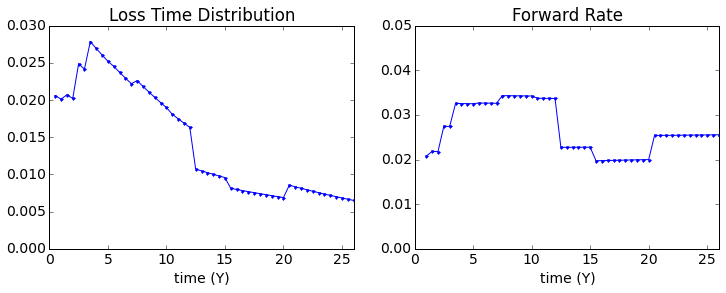

In [11]:
figure(figsize=[12, 4])
subplot(1, 2, 1)

plot(t, op[0], '.-');
xlabel('time (Y)')
title('Loss Time Distribution')
xlim(0, 26)

subplot(1, 2, 2)
plot(t[1:], np.diff(-(np.log(d[0]))), '.-')
title('Forward Rate');
xlabel('time (Y)')
xlim(0, 26)
ylim(0, .05);

* The resulting forward rate is almost piece-wise flat
* This validates the piece-wise flat forward rate interpolation
  * or equivalently the linear interpolation in cumulative yield $y(t) = - \log(b(t))$
* The ME implied tension parameter is large

## Approximate fit

Now we construct the curve using $W^{-1} = 4E$ and $40E$.

In [12]:
fmt.displayDF(df_swap.T, "2f")

,1,2,3,5,7,10,12,15,20,25,100
Par Spread (%),4.20,4.30,4.70,5.40,5.70,6.00,6.10,5.90,5.60,5.55,5.55
Bid/Ask Spread (%),0.02,0.02,0.03,0.04,0.05,0.06,0.07,0.10,0.15,0.20,1.00
Fit Error % ($W^{-1} = 0.0E$),-0.00,0.00,0.00,0.00,-0.00,0.00,0.00,-0.00,0.00,0.00,0.00
Fit Error % ($W^{-1} = 4.0E$),0.00,0.02,0.02,0.00,0.01,-0.02,-0.08,-0.06,-0.08,-0.30,-1.10
Fit Error % ($W^{-1} = 40.0E$),0.08,0.17,0.15,-0.02,-0.17,-0.54,-0.82,-0.98,-1.19,-1.52,-2.17


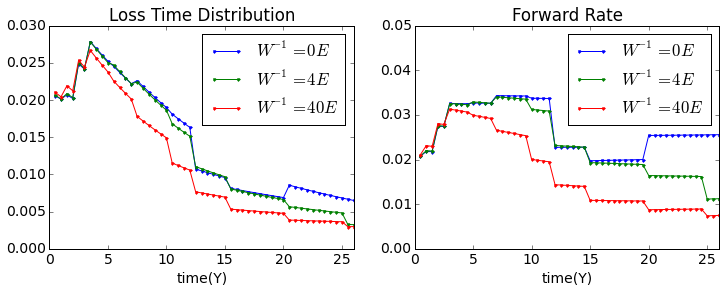

In [13]:
figure(figsize=[12, 4])
subplot(1, 2, 1)

tags = map(lambda d : '$W^{-1}=%d E$' % d, np.array(ef)*2)

plot(t, np.array(op).T, '.-');
xlabel('time(Y)')
title('Loss Time Distribution')
xlim(0, 26)
legend(tags)

subplot(1, 2, 2)
plot(t[:-1], np.array(fwd).T, '.-')
xlabel('time(Y)')
title('Forward Rate');
legend(tags)
xlim(0, 26)
ylim(0, .05);

* the resulting forward rate is still very close to piecewise flat
* The maximum entropy principle implies large tension parameter $\lambda$
* Smoothness in forward rate is likely a false belief

## Arbitrage removal

The market mid prices could be inconsistent and arbitrageable, 

* directly bootstrapping would lead to negative forward discount rate

How can we adjust the market prices to remove aribitrage?
* it is not easy as there are (infinitely) many ways to do so 

ME method can remove arbitrages with minimal distortion to the market:
* with a non-zero $W^{-1}$, ME method guarantees to find an arbitrage free solution 
* the reliability of the market prices can be incorporated into $W^{-1}$

## An arbitrageable market

In [14]:
par[4] = .03
ba[4] = .001
a, b, t = swapCons(par, mats, freq)
ef = [0.1, 2., 20.]

df_swap_arb = pd.DataFrame(np.array([par, ba]).T*100, columns=["Par Spread (%)", "Bid/Ask Spread (%)"], 
                       index=mats)

op, fit, d, fwd = fitSwap(a, b, ba, ef)

for e, f in zip(ef, fit) : 
    df_swap_arb["Fit Error %% ($W^{-1} = %.1fE$)" % (e*2)] = (f-par)*100

fmt.displayDF(df_swap_arb.T, "3g")

,1,2,3,5,7,10,12,15,20,25,100
Par Spread (%),4.2,4.3,4.7,5.4,3,6,6.1,5.9,5.6,5.55,5.55
Bid/Ask Spread (%),0.02,0.02,0.03,0.04,0.1,0.06,0.07,0.1,0.15,0.2,1
Fit Error % ($W^{-1} = 0.2E$),0.00351,0.00435,0.00771,-0.303,0.759,-0.00769,-0.00564,-0.00268,0.00653,-0.00438,-0.155
Fit Error % ($W^{-1} = 4.0E$),0.00899,0.0226,0.0165,-0.282,1.02,-0.123,-0.102,-0.0708,-0.0816,-0.292,-1.08
Fit Error % ($W^{-1} = 40.0E$),0.0787,0.147,0.0644,-0.344,1.85,-0.761,-0.963,-1.08,-1.25,-1.57,-2.19


* 7Y swap is clearly out of line with the rest.
* The ME method automatically adjusts the 7Y prices with minimal distortion to other tenors.

## Identify bad prices

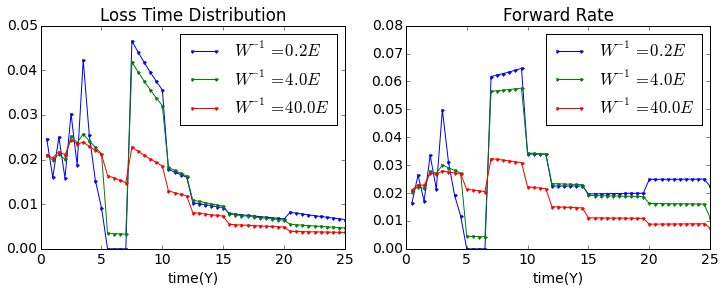

In [15]:
figure(figsize=[12, 4])
subplot(1, 2, 1)

tags = map(lambda d : '$W^{-1}=%.1fE$' % d, np.array(ef)*2)

plot(t, np.array(op).T, '.-');
xlabel('time(Y)')
title('Loss Time Distribution')
xlim(0, 25)
legend(tags)

subplot(1, 2, 2)
plot(t[:-1], np.array(fwd).T, '.-')
xlabel('time(Y)')
title('Forward Rate');
legend(tags)
xlim(0, 25)
ylim(0, .08);

* The resulting ME distribution also identifies the bad 7Y price
* We can adjust the $W^{-1}$ to reduce the impact of bad prices

## Summary of maximum entropy

The maximum entropy method is elegant and powerful 
* effective in dealing with partial information and incomplete market
* bring many types of problems into a consistent framework

Main limitations:
* all possible outcomes has to be enumerated, not good for high dimensionality
* it is static, and does not give useful insight on the dynamics


The ME problem and solution are measure dependent
* e.g., results are different between spot measure and forward measure

# Risk Capital Allocation

Brit Hume: Fairness is not an attitude. It's a professional skill that must be developed and exercised.

## Bank's trading book

<center>
<img src="img/banktree.png" width=600 height=400>
</center>

* The trading book hierarchy is well defined and stable over time
* Leaf nodes are the lowest level books, only containing individual trades, but not books

## Diversification benefits

$\bs w = \sum_i \bs w_i$ is the company's whole portfolio ($\bs w$ has all the assets in the universe)
* $\bs w_i$ is the notional vector of the i-th business unit
* $\bs w_i$ could represent a single trade in the ultimate granularity

$c(\cdot)$ is a cost function of a portfolio:
* $c(\bs w) = c\left(\sum_i \bs w_i\right)$ is the cost of the whole company
* $c(\bs w_i)$ is the standalone cost of the i-th business unit of the company
* risk capital is the most important cost functions, such as VaR, IRC

For most risk capital metrics: $c\left(\sum_i \bs w_i\right) < \sum_i c(\bs w_i)$
* because of the diversification/hedging benefits
* total diversification benefits is therefore $\sum_i c(\bs w_i) - c\left(\sum_i \bs w_i\right)$

## Allocation problem

How to divide the firm's total $c(\bs w)$ to individual business in an additive manner?
* allocated cost $\xi_i$: $c(\sum_i \bs w_i) = \sum_i \xi_i$ by definition.
* The core of the allocation problem is the fair distribution of diversification benefits
  * $c(\bs w_i) - \xi_i$ is the diversification benefit allocated to the i-th business unit
* In practice, allocation runs all the way down to individual trades

## Importance of allocation

Business performance is measured by return on capital (ROC)
* ROC is computed using allocated capital $\xi_i$, not the standalone capital $c(\bs w_i)$
* certain business is only viable as part of a bank as $\xi_i < c(\bs w_i)$

Business incentive is a critical consideration.
* allocated capital is actively managed by business heads
* allocation method directly affects trading desks' behaviour
* allocation method should incentivize risk reduction
  * a business unit's action to reduce the firm's overall risk should also reduce its own allocation

## Replacement cost

We use **replacement cost** as an example to illustrate allocation methods:

$$ \rc(\bs w) = \max(\bs w^T \bs v, 0)$$

* $\bs v$ is the PV vector of all tradable instruments (per unit notional)
* $\bs w^T \bs v$ is the portfolio's total PV

Replacement cost is the aggregated PV of the portfolio against a particular counterparty, floored at 0 (if you owe money to your counterparty, no cost for this portfolio) 
* part of the Basel 3 leveraged balance sheet capital 
* it is a measure of marked-to-market loss if the counterparty defaults

## A simple example

A bank has only three trade against a counterparty, their PVs are: $ a = 12, b = 24, c = -24$
* The bank's total replacement cost is therefore: 
$$\rc(a + b + c) = \max(12 + 24 - 24, 0) = 12$$
* Diversification benefits: 
$$
\rc(a) + \rc(b) + \rc(c) - \rc(a+b+c)
= 12 + 24 + 0 - 12 = 24$$

## Standalone allocation

The simplest allocation strategy, allocation proportional to the standalone cost:

$$ \xi_i = \frac{c(\bs w_i)}{\sum_i c(\bs w_i)} c(\sum_i \bs w_i) $$

Standalone allocation results:

|  | A | B | C | Total |
| :--: | :--: | :--: | :--: |
| PV | 12 | 24 | -24 | 12 |
| Standalone RC | 12 | 24 | 0 | 36 |
| Standalone allocation | 4 | 8 | 0 | 12 |

* commonly used in practice
* not intrinsically additive, need the ad hoc scaling factor
* gives wrong business incentives (more on this later)

## A model for fairness

In cooperative game theory, fairness is modeled by the following axioms:

* efficiency: allocations sum up to total
* symmetry: if two units' contribution are identical to any arbitrary subsets of units, their allocations are the same
* linearity: allocation of sums equals to the sum of allocations
* null: if a unit has no contribution to any subsets, it has 0 allocation

Shapley allocation is the **only** fair allocation method:

* A unit's allocation equals to the average of its marginal contributions over all possible permutations

Developed in 1960s, Sir L. Shapley received the 2012 Nobel prize.

## Shapley allocation example

| Permutations | Cumulative RC | A | B | C |
| :---: | :---: | :---: | :---: | :---: |
| A=12, B=24, C=-24 | 12, 36, 12  | 12 | 24 | -24  
| A=12, C=-24, B=24 | 12, 0, 12 | 12 |	12 | -12 | 
| B=24, C=-24, A=12 |	24, 0, 12 	| 12 |	24 |	-24 | 
| C=-24, B=24, A=12 |	0, 0, 12 	| 12 |	0 |	0 | 
| B=24, A=12, C=-24 |	24, 36, 12 |	12 	|24 	|-24 | 
| C=-24, A=12, B=24 |	0, 0, 12 	| 0 |	12 |	0 |
|| Averages |	10 |	16 |	-14 | 

Shapley allocation allocates the incremental cost to the trade that makes it happen.

Shapley allocation is additive by construction
* no need for any ad hoc scaling factors 

Shapley allocation is computationally expensive
* requires Monte Carlo simulation for any non-trivial allocaiton problems
* e.g. the total number of permutation for 10 units is $10! = 3,628,800$

## Associativity

Associativity means a top-down application of the allocation yields identical results as a bottom-up application:

<center>
<img src="img/assoc.png" width=400 height=400>
</center>

Neither standalone nor Shapley allocation is associative:

| | allocation to [A] | allocation to [BC] |
| :---:| :---:| :---:
| Top-down | 12 | 0 |
| Standalone bottom-up | 4 | 8 |
| Shapley bottom-up | 10 | 2 |

Shapley bottom-up [BC] = 16-14 = 2

Associativity is critical in practice:
* Without it, the allocation algorithm is vulnerable to manipulations via trade rebooking.

The direction of attack:
* Tweak the Shapley allocation to make it associative

## Aumann-Shapley allocation

A continuous limit of the Shapley allocation with allocation units being trades with infinitesimal notionals. 

$$\bs u^T = \int_0^1 \frac{\partial c(q\bs w)}{\partial (q \bs w)} dq 
\iff u_k = \int_0^1 \frac{\partial c(q\bs w)}{\partial (q w_k)} dq 
$$

* $q$ is between 0 and 1
* $\bs u$ is the allocation per unit notional of instruments
* the allocation to individual trades in the i-th unit are $\bs u \odot \bs w_i$
* the allocation to a portfolio is therefore $\xi_i = \bs u^T \bs w_i$.
* Associative by construction: inherited from vector summation

A-S allocation is much more efficient to compute than Shapley allocation.

## The big blender

Conceptually the A-S allocation, 
$\bs u^T = \int_0^1 \frac{\partial c(q\bs w)}{\partial (q \bs w)} dq $, 
 is a big blender:


<img src="img/bigblender.png" width=200 height=200>


* all organizational information are lost
* the allocation is computed from a homogenous soup of trades

## Additivity of Aumann-Shapley

The A-S allocation is additive by construction:

$$\begin{array}
\\ \sum_i \xi_i &= \sum_i \bs u^T \bs w_i = \bs u^T \bs w \\
&= \int_0^1 \frac{\partial c(q\bs w)}{\partial (q \bs w)} \bs w \; dq = \int_0^1 \frac{\partial c(q\bs w)}{\partial (q \bs w)} \frac{\partial (q \bs w)}{\partial q} \; dq \\
&= \int_0^1 d c(q\bs w) = c(\bs w) - c(\bs 0)
\end{array}$$

* it is customary to define $c(\bs 0) = 0$, ie, empty portfolio should have zero risk or capital cost.

## Euler allocation

If the cost function is homogeneous, ie, $c(q \bs w) = q c(\bs w)$, the A-S allocation reduces to the Euler allocation:

$$ \bs u^T = \int_0^1 \frac{\partial c(q\bs w)}{\partial (q \bs w)} dq = \int_0^1 \frac{\partial c(\bs w)} { \partial \bs w} dq  = \frac{ \partial c(\bs w)} {\partial \bs w} $$

* In practice, most risk capital metrics are homogeneous
* Euler allocation is by trades' marginal contribution
* A-S/Euler allocation are computationtally efficient
  * no need for Monte Carlo

## Euler allocation of replacement cost

$$ \bs u^T = \frac{\partial \rc(\bs w)}{\partial \bs w} 
= \frac{\partial \max(\bs w^T \bs v, 0)}{\partial \bs w}
= \ind(\bs w^T \bs v > 0) \bs v^T
$$

* $\frac{d}{dx} \max(x, 0) = \ind(x > 0)$, where $\ind(\cdot)$ is the indicator function
* the allocation is trade's MtM if the total PV is positive, otherwise 0
* it is indeed associative, the sum of allocation to B and C is 0

|  | A | B | C | Total |
| :--: | :--: | :--: | :--: |:--: |
| A-S/Euler Allocation | 12 | 24 | -24 | 12 |

## Perverse incentives

* A-S allocation could produce perverse incentives in practice
* A consequence of using infitesimal sized allocation unit
* Fairness depends on organization

Consider replacement cost of a bank with two trading desks X and Y:

| Day | X PV | Y PV | Banks RC | A-S/Euler Allocation |
| :---: | :---: | :---: | :---: | :---: |
| 1 | 12 | -10 | 2 | X=12, Y=-10 |
| 2 | 12 | -14 | 0 | X=0, Y=0 |

  * Y gets penalized for reducing the bank’s overall RC to 0
  * X gets a big reduction in capital allocation without doing anything

## What's wrong with Shapley?

* The associativity is broken by two permutations that violates the bank’s organizational constraint.
* If we remove the two offending permutations from averaging, the Shapley allocation becomes associative.

| Permutations | Cumulative RC | A | B | C |
| :---: | :---: | :---: | :---: | :---: |
| A=12, B=24, C=-24 | 12, 36, 12  | 12 | 24 | -24  
| A=12, C=-24, B=24 | 12, 0, 12 | 12 |	12 | -12 | 
| B=24, C=-24, A=12 |	24, 0, 12 	| 12 |	24 |	-24 | 
| C=-24, B=24, A=12 |	0, 0, 12 	| 12 |	0 |	0 | 
| B=24, <font color=red> A=12</font>, C=-24 |	24, 36, 12 |	12 	|24 	|-24 | 
| C=-24, <font color=red> A=12</font>, B=24 |	0, 0, 12 	| 0 |	12 |	0 |
| **Averages** | **of all**|	10 |	16 |	-14 | 
| **Averages** | **of admissibles** | 12 | 15 | -15 |



## Constrained Shapley

A unit’s allocation equals its average incremental contribution, where the average is taken over all the permutations that are admissible under the organizational constraints. 

<center>
<img src="img/banktree.png" width=600 height=400>
</center>

Admissible permutations:

* All permutations are admissible for nodes with the same parent 
* A branch (i.e. a node and all of its descendents) has to be permuted as a whole.



|Admissible Permutations|Inadmissible Permutations|
|:---:|:----:|
| <img src="img/alloc-adm1.png" width=400> </br> <img src="img/alloc-adm2.png" width=400>|  <img src="img/alloc-inadm1.png" width=400> </br> <img src="img/alloc-inadm2.png" width=400>|

* mixing trades from different leaf nodes also lead to inadmissible permutations

## Correct incentives

The constrained Shapley is additive and associtive by construction, it gives the right incentives:

| Day | X PV | Y PV | Banks RC | C-Shapley Allocation |
| :---: | :---: | :---: | :---: | :---: |
| 1 | 12 | -10 | 2 | X=7, Y=-5 |
| 2 | 12 | -14 | 0 | X=6, Y=-6 |

* C-Shapley allocation gives the correct incentive for Y to reduce the overall bank’s RC.

## C-Shapley features

Advantages of C-Shapley:

* additive and associative by construction
* gives the right business incentive

However, it is still computationally expensive:

* Impossible to exhaust all admissible permutations
* Monte Carlo permutation of large number of trades is challenging

Constrained Aumman-Shapley (CAS) is a continuous extension to C-Shapley:
* computationally efficient
* equivalent to C-Shapley on all nodes, different only in the allocation to individual trades

## Business incentives

We take the following simple bank as an example:

<img src="img/alloc-abc.png" width=300> 

The covariance matrix between the returns of three businesses are:

|  | A | B | C |
| :--: | :--: | :--: | :--: |
| A | 1 | 0.65 | -0.9 |
| B | 0.65 | 1 | -0.9 |
| C | -0.9 | -0.9 | 1 | 

We then scale the size of business C and see what happens to the firm's total VaR and its VaR allocations.

## Allocation comparison

<table style="border-style:hidden">
<tr style="border-style:hidden">

<td style="border-style:hidden"><img src="img/alloc-standalone.png" width=300></td><td style="border-style:hidden"><img src="img/alloc-euler.png" width=300></td><td style="border-style:hidden"><img src="img/alloc-cas.png" width=300></td>

</tr>
</table>

* Yellow region: increasing C reduces firm's overall VaR
* Standalone allocation failed to recognize and reward hedges
* Euler allocation failed to distribute diversification benefits
* Euler allocation is unstable
* Only C-S/CAS recognizes the main driver of the risk

## Allocation summary

| Criteria | C-S/CAS | A-S/Euler | Shapley | Standalone |
| :---: | :---: | :---: | :---: | :---: |
| Associativity | yes | yes | <font color=red> no </font> | <font color=red> no </font> |
| Negative allocations for hedges | yes | yes | yes | <font color=red> no </font> |
| Stability | good | <font color=red> poor </font> | good | best |
| Predict marginal changes | good | best | good | <font color=red> poor </font> |
| Distribute diversification benefits | yes | <font color=red> no </font> | yes | yes |
| Recognize main risk driver | best | good | best | <font color=red> poor </font> |
| Computational speed | good | good | <font color=red> poor </font> | best |


C-Shapley/CAS allocation:
* stands out with the best set of features
* a candidate for universal risk capital allocation method
  * applicable to a wide variety of risk capital metrics in banks
  * applicable to the risk allocations of multiple trading strategies

## Achieve the impossible

Change allocation methodology is almost mission impossible:
* zero-sum: a desk's gain is another desk's loss
* it affects the interests and livelihood of every business unit
* diffcult to build consensus amongst business units with conflicting interests

The only way to implement the change is to:
* establish a theoreticaly sound methodology that is impossible to argue against (C-Shapley/CAS)
* explain the methodology to every business unit, and ask business heads to document their objections
  * "I don't like my allocation" is not a good objection
* the process takes time and effort

optional 

# Constrained Aumman-Shapley

## Constrained Aumman-Shapley

<img src="img/cas.png" height=500 width=500>

* Constrained Aumman-Shapley (CAS) is a continuous generaization of the C-Shapley allocation
* Conceptually it is a small blender, that works within the organizational boundary

## CAS allocation

The allocation per unit notional for trades in the portfolio B, conditioned on an admissible permutation is:

$$ \bs u^T(\bs w_B |\bs w_A) = \int_0^1 \frac{\partial c(\bs w_A + q\bs w_B)}{\partial (q \bs w_B)} dq $$

The unconditional CAS allocation per unit notional for leaf node B is:

$$\bs u^T(\bs w_B) = \mathbb{E}\left[\bs u^T(\bs w_B | \bs w_A)\right]$$, 

* the expectation is taken over all admissible permutations (i.e., all $\bs w_A$)
* the allocation for each trade in B is therefore $\bs u(\bs w_B) \odot \bs w_B$
* the allocation for the portfolio B is $\bs u^T(\bs w_B) \bs w_B$

## CAS features

* Identical to C-Shapley for all nodes, only differ in individual trades
* Additive, for each admissible permutation:

$$\begin{array}{l}
\bs u^T(\bs w_B | \bs w_A) \bs w_B &= \int_0^1 \frac{\partial c(\bs w_A + q\bs w_B)}{\partial (q \bs w_B)} \bs w_B dq =  \int_0^1 \frac{\partial c(\bs w_A + q\bs w_B)}{\partial (q \bs w_B)} \frac{\partial (q \bs w_B)}{\partial q} dq \\
&= \int_0^1 d c(\bs w_A + q \bs w_B) = c(\bs w_A + \bs w_B) - c (\bs w_A)
\end{array}$$

* Associative, follows that of the C-Shapley

We will show later that CAS is:
* Computationally efficient 
* Gives the right business incentives

## Separability

The cost function is separable if

$$ \frac{\partial c(\bs w_A + q\bs w_B)}{\partial (q \bs w_B)} = \bs a^T(\bs w_A + q\bs w_B) S $$

* $\bs a$ is a vector of the portfolio level parameters only
* $S$ is a matrix that only depends on individual trade's characteristics

Vast majority of risk capital metrics are separable:
* VaR and VaR variants like IRC, CRM
* Expected shortfall
* Replacement cost

## Separate replacement cost

$$\begin{array}{l}
\frac{\partial }{\partial (q \bs w_B)} \rc(\bs w_A + q \bs w_B) &= \frac{\partial }{\partial (q \bs w_B)} \max\left((\bs w_A + q \bs w_B)^T \bs v, 0 \right) \\
&= \ind ((\bs w_A + q \bs w_B)^T \bs v > 0) \bs  v^T  
\end{array}$$

* $\ind \left((\bs w_A + q \bs w_B)^T \bs v > 0\right)$ is only a function of the portfolio PV
* $\bs v$ is a vector of individual instrument's PV (per unit notional)

## Efficiency and separability

For separable metrics, CAS allocation reduces to:

$$\mathbb{E}\left[\bs u^T(\bs w_B | \bs w_A)\right] = \mathbb{E}\left[\int_0^1 \frac{\partial c(\bs w_A + q\bs w_B)}{\partial (q \bs w_B )} dq \right] = \mathbb{E}\left[\int_0^1 \bs a^T(\bs w_A + q\bs w_B) dq \right] S $$

* Being independent of $\bs w_A$ or $q$, $S$ can be pulled out of the expectation.

With separability, CAS allocation is extremely efficient:
1. Simulate $\bs a(\bs w_B) = \mathbb{E}\left[\int_0^1 \bs a(\bs w_A + q\bs w_B) dq\right]$
  * only sample leaf nodes' permutations
  * no need to permute and track individual trades 
  * many orders of magnitude faster, millions of trades vs. thousands of leaf nodes
2. The product $\bs a^T(\bs w_B) S$ can be done cheaply as a second step

## Value at Risk

Value at risk (VaR) is a quantile measure of the portfolio's risk. 

* If a portfolio's 10-day 99% VaR is \$10M, then the probabilty for the portfolio to lose more than \$10M in 10 days is 1%.
* It is the most important and widely quoted risk management metric


Mathematically VaR is a quantile measure:
$$\renewcommand{rv}{\tilde{\bs v}}$$

$$ \mathbb{P}[\bs w^T \rv > \text{VaR}_\alpha] = \alpha $$

* VaR is communicate as a positive number despite being a loss
* We write $\text{VaR} < 0$ and use $|\text{VaR}|$ explicitly when needed
* $\alpha$ is the quantile, like 99%
* $\bs w$ is the portfolio's notional vector of instruments, 
* $\rv$ is the PV **change** of a unit notional instrument over the 10-day period, it is a random vector
* The above equation explicitly defined a $\text{VaR}_\alpha(\bs w)$ function

## Computing VaR:

* Historical simulation: replay historical 10-day returns of all risk factors on today's portfolio
* Model simulation: build risk factor models using historical data and simulate many scenarios from the model

## Marginal contribution to VaR:

A useful relationship:
$$
\frac{\partial \v}{\partial \bs w} = \mathbb{E}[\rv^T | \bs w^T \rv = \v]
$$

which can be derived as:

$$\small \begin{array}
\\ 0 &= \frac{\partial}{\partial \bs w} \mathbb{P}\left[\bs w^T \rv > \v \right] = 
\frac{\partial}{\partial \bs w} \mathbb{E}\left[\ind(\bs w^T \rv - \v > 0)\right] \\
&= \mathbb{E}\left[\frac{\partial}{\partial \bs w} \ind (\bs w^T \rv - \v > 0)\right] 
= \mathbb{E}\left[ \delta (\bs w^T \rv - \v) (\rv^T  - \frac{\partial \v}{\partial \bs w})\right] \\
&= \mathbb{E}\left[\rv^T - \frac{\partial \v}{\partial \bs w} \vert \bs w^T \rv = \v\right]
= \mathbb{E}\left[\rv^T \vert \bs w^T \rv = \v\right]  - \frac{\partial \v}{\partial \bs w}
\end{array}$$

* $\ind(x)$ is the indicator function, $\frac{d}{dx}\ind(x>0) = \delta(x)$
* $\delta(x)$ is the Dirac's delta function, with $\intr f(x) \delta(c) dx = f(c)$

## Separability of VaR

The VaR can be written in a separable form using its marginal contribution:

$$\begin{array}{l}
\frac{\partial \v (\bs w_A + q \bs w_B)}{\partial (q \bs w_B)} &= \mathbb{E}[\rv^T | (\bs w_A + q\bs w_B)^T \rv = \v] \\
&= \bs k^T(\bs w_A + q\bs w_B) V
\end{array}$$

The first equality can be proved similarly using the steps in the previous slide.
* $\bs k^T$ is a <a href=http://faculty.washington.edu/ezivot/econ589/risk_technical_0806_epperlein.pdf>Gaussian Kernel</a>
* $V$ is a matrix of the historical 10-day PnL for all the individual trades

# Assignments

Homework

* Complete [homework set 10](http://yadongli.github.io/nyumath2048/)